# Topics of Sociability and Solidarity in Recollections of  Men and Women who survived Auschwitz-Birkenau



 ### Research Question:

- Were men or women more likely to recall acts of solidarity and sociability when recalling life in Birkenau?

## Load the relevant data

Load the libraries needed to work with the data

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False

Set up the paths to data

In [2]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

In [3]:
p_women = pd.read_csv(input_directory+'complete_w'+'/'+'stationary_probs.csv')

p_men = pd.read_csv(input_directory+'/'+'complete_m'+'/'+'stationary_probs.csv')

p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

input_directory = parent +'/'+ constants.output_data_report_statistical_analysis
input_file = 'strength_of_association_odds_ratio_complete_w_complete_m.csv'
df_fisher = pd.read_csv(input_directory+input_file)

### Identify topics related to sociability in Dataset 1

Identify the topic relating to social relations

In [4]:
social_bonds_w = p_women[p_women.topic_name=='social bonds']['stationary_prob'].values[0]
social_bonds_m = p_men[p_men.topic_name=='social bonds']['stationary_prob'].values[0]

Identify the topic relating to friendship

friends_w = p_women[p_women.topic_name=='friends']['stationary_prob'].values[0]
friends_m = p_men[p_men.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [5]:
aid_giving_w = p_women[p_women.topic_name=='aid giving']['stationary_prob'].values[0]
aid_giving_m = p_men[p_men.topic_name=='aid giving']['stationary_prob'].values[0]

food_sharing_w = p_women[p_women.topic_name=='food sharing']['stationary_prob'].values[0]
food_sharing_m = p_men[p_men.topic_name=='food sharing']['stationary_prob'].values[0]

clothing_provision_w = p_women[p_women.topic_name=='clothing provision']['stationary_prob'].values[0]
clothing_provision_m = p_men[p_men.topic_name=='clothing provision']['stationary_prob'].values[0]

## Verify that menstruation is more probable for women

In [6]:
mens_w = p_women[p_women.topic_name=='menstruation']['stationary_prob'].values[0]
mens_m = p_men[p_men.topic_name=='menstruation']['stationary_prob'].values[0]

In [7]:
mens_w>mens_m

True

In [8]:
mens_w / mens_m

675.0236625070487

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is slightly more probable for women than for men if studied through the Markovian framework. Overall, women tend to discuss it more than men. Overall we can see a strong tendency of women discussing aid giving more than men do. It is more significant for women if looked through the traditional Fisher test that compares raw probabilities. 

### Quantitative evidence

In [9]:
print (aid_giving_w/aid_giving_m)

1.082679057915836


### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/aid%20giving.png)

### Load the results of Fisher test and odds ratio analysis

In [10]:
display (df_fisher[df_fisher.topic_word=="aid giving"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
19,8,aid giving,0.000024,1.291328,0.774397,1377,506,True


## Observation 2

### Qualitative description:

The topic describing food sharing is more significant for women than for men. The probability that women discuss food sharing is by 20% higher. Fisher test also confirms this.

### Quantitative evidence

print (food_sharing_w/food_sharing_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/food%20sharing.png)

### Load the results of Fisher test and odds ratio analysis

display (df_fisher[df_fisher.topic_word=="food sharing"])

## Observation 3

### Qualitative description:

The topic describing friendship is more significant for women than for men. This is confirmed by the Fisher test. This where we find the biggest difference.

### Quantitative evidence

print (friends_w/friends_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/friends.png)

### Load the results of Fisher test and odds ratio analysis

display (df_fisher[df_fisher.topic_word=="friends"])

## Observation 4

### Qualitative description:

The topic describing social bonds is more significant for women than for men.

### Quantitative evidence

In [11]:
print (social_bonds_w/social_bonds_m)

1.2978576445159742


### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/social%20bonds.png)

### Load the results of Fisher test and odds ratio analysis

In [12]:
display (df_fisher[df_fisher.topic_word=="social bonds"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
18,97,social bonds,0.000016,1.363893,0.733195,886,303,True


## Observation 5

### Qualitative description:

The topic describing clothing provisions is more significant for women than for men.

### Quantitative evidence

print (clothing_provision_w/clothing_provision_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/clothing%20provision.png)

### Load the results of Fisher test and odds ratio analysis

display (df_fisher[df_fisher.topic_word=="clothing provision"])

## Visualization

In [13]:
#relevant_terms = ["food sharing","friends","social relations","aid giving","clothing provision","rumors","cultural activities"]
relevant_terms = ["social bonds","aid giving","rumors","cultural activities"]
plot_table = df_fisher[df_fisher.topic_word.isin(relevant_terms)][['topic_word','complete_w','complete_m']]

In [14]:
plot_table

,topic_word,complete_w,complete_m
18,social bonds,1.363893,0.733195
19,aid giving,1.291328,0.774397
39,rumors,1.421063,0.703698


In [15]:
plot_table = plot_table.rename(columns={"complete_w": "women", "complete_m": "men"})

In [16]:
plot_table = pd.melt(plot_table, id_vars=['topic_word'], value_vars=['women','men'])

In [17]:
plot_table = plot_table.rename(columns={"variable": "Gender"})

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

palette ={"women": "#ff7f0e", "men": "#1f77b4"}
sns.set(font_scale=2) 
plt.figure(figsize=(25, 24))
chart = sns.barplot(x="topic_word", 
            y="value", 
            hue="Gender", 
            data=plot_table,palette=palette)

#ax1, ax2 = chart.axes

chart.axhline(1,linestyle="--",linewidth=6,c='black')
plt.ylabel("Strength of association", size=28)
plt.xlabel("Topic words", size=28)

plt.setp(chart.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='40')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize=28)
plt.savefig("Figure_2.png")

/miniconda3/envs/au_env/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


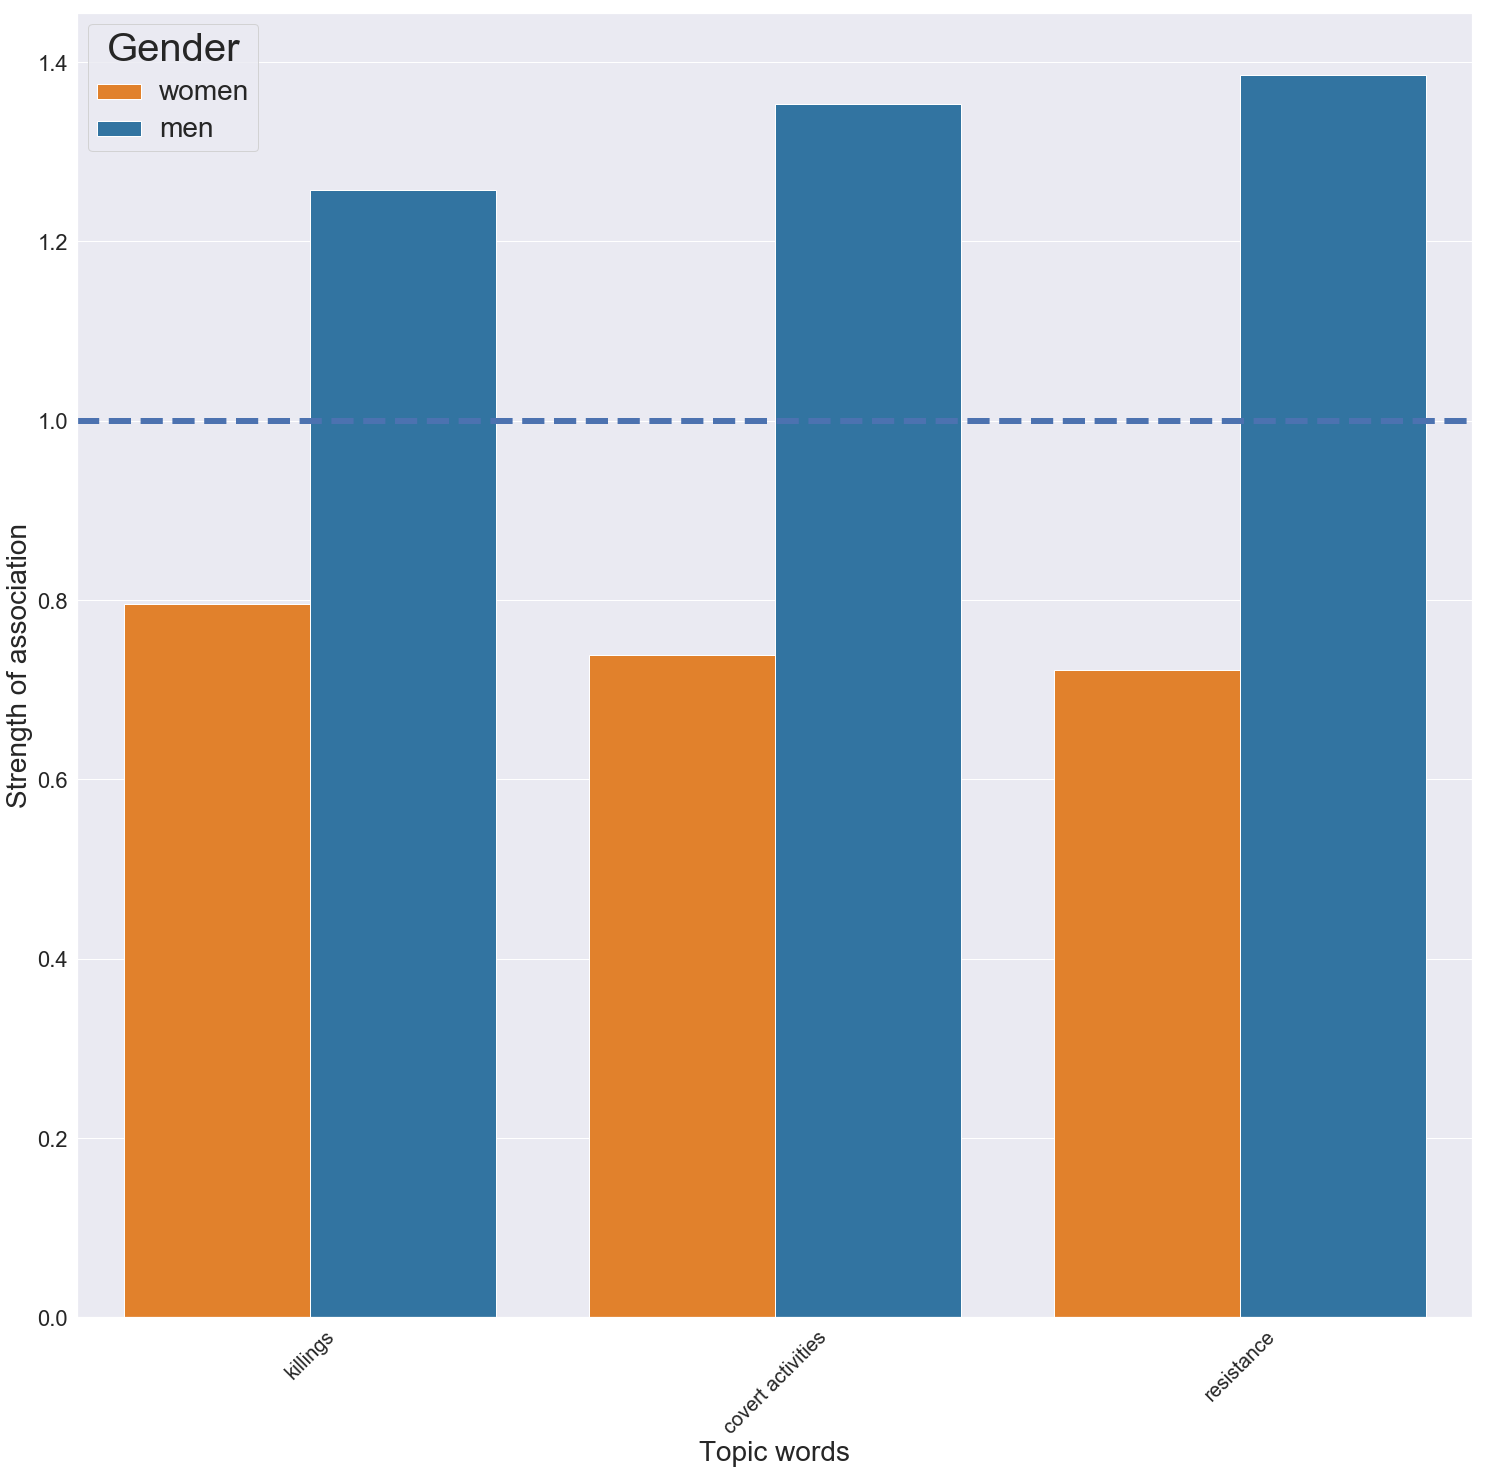

In [19]:
#relevant_terms = ["black market activities","covert economic activities","bribery","smuggling","resistance activities","hangings","covert activities"]
relevant_terms = ["covert activities","resistance","killings"]

plot_table = df_fisher[df_fisher.topic_word.isin(relevant_terms)][['topic_word','complete_w','complete_m']]

plot_table = plot_table.rename(columns={"complete_w": "women", "complete_m": "men"})

plot_table = pd.melt(plot_table, id_vars=['topic_word'], value_vars=['women','men'])

plot_table = plot_table.rename(columns={"variable": "Gender"})



import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2) 
plt.figure(figsize=(25, 24))
chart = sns.barplot(x="topic_word", 
            y="value", 
            hue="Gender", 
            data=plot_table,palette=palette)
plt.ylabel("Strength of association", size=28)
plt.xlabel("Topic words", size=28)
chart.axhline(1,linestyle="--",linewidth=6)
plt.setp(chart.get_legend().get_texts(), fontsize='28') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='40')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize=20)



## Interpretation

The probabilities that we hear women recalling memories of solidarity and sociability are higher than the probabilities that we hear men discussing these topics. The measuring of the strength of association between these topics and gender produced the similar result. Topics of solidarity and sociability are significantly more associated with women than with men.

Interestingly, topics expressing more intimate forms of solidarity and sociability (food sharing and friendship) are also more likely to be mentioned by women and men. The probability that we hear a woman discussing friendship when recalling her stay in Birkenau is by 73% higher. The probability that we hear a woman discussing food sharing when recalling her stay in Birkenau is by 30% higher. The measurement of strength of association between gender and these topics also brought about similar results.

All this suggests that acts of solidarity and social interactions were more likely to take place among women than among men in Birkenau. Specifically, more intimate forms of sociability and solidarity were more likely among women than among men.